**Análisis de mercado inmobiliario**

### Importación de paquetes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

#Automcompletar rápido
%config IPCompleter.greedy=True

### Importación de datos

In [2]:
listings = pd.read_csv('../Datos/listings.csv')
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,80,2019-05-14,1.21,2,180,4,NaN
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31,4,33,2018-05-29,0.39,2,364,0,NaN
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,15,0,NaN,NaN,5,222,0,NaN
3,24805,Gran Via Studio Madrid,346366726,A,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,5,12,2020-03-01,0.51,1,115,2,NaN
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,2,149,2018-05-15,1.65,1,349,0,NaN


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              18909 non-null  int64  
 1   name                            18906 non-null  object 
 2   host_id                         18909 non-null  int64  
 3   host_name                       18883 non-null  object 
 4   neighbourhood_group             18909 non-null  object 
 5   neighbourhood                   18909 non-null  object 
 6   latitude                        18909 non-null  float64
 7   longitude                       18909 non-null  float64
 8   room_type                       18909 non-null  object 
 9   price                           18909 non-null  int64  
 10  minimum_nights                  18909 non-null  int64  
 11  number_of_reviews               18909 non-null  int64  
 12  last_review                     

In [6]:
listings_det = pd.read_csv('../Datos/listings.csv.gz', compression='gzip')
listings_det.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20210910193531,2021-09-11,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,https://www.airbnb.com/users/show/13660,...,4.89,4.77,4.85,NaN,f,2,0,2,0,1.21
1,21853,https://www.airbnb.com/rooms/21853,20210910193531,2021-09-11,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,https://www.airbnb.com/users/show/83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.39
2,23001,https://www.airbnb.com/rooms/23001,20210910193531,2021-09-11,Apartmento Arganzuela- Madrid Rio,"Apartamento de tres dormitorios dobles, gran s...","Barrio Arganzuela, junto a Madrid Rio, zonas c...",https://a0.muscache.com/pictures/58e6a770-509c...,82175,https://www.airbnb.com/users/show/82175,...,NaN,NaN,NaN,NaN,f,5,4,1,0,NaN
3,24805,https://www.airbnb.com/rooms/24805,20210910193531,2021-09-11,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,https://www.airbnb.com/users/show/346366726,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.51
4,26825,https://www.airbnb.com/rooms/26825,20210910193531,2021-09-11,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,https://www.airbnb.com/users/show/114340,...,4.71,4.70,4.72,NaN,f,1,0,1,0,1.65


### Creo la base de datos y cargo los datos

In [8]:
con = sa.create_engine('sqlite:///../Datos/airbnb.db')
listings.to_sql('listings', con = con, if_exists = 'replace')
listings_det.to_sql('listings_det', con = con, if_exists = 'replace')

18909

### Creo los DF a partir de las tablas de la BD

In [3]:
#con = sa.create_engine('sqlite:///../Datos/airbnb.db')

from sqlalchemy import inspect
insp = inspect(con)
tablas = insp.get_table_names()
tablas # con esto te da el nombre de las tablas en la BD

# cargos las tablas en los DF
listings = pd.read_sql('listings', con)
listings_det = pd.read_sql('listings_det', con)

### Datos externos

El precio del m2 por distrito lo cargo desde https://www.idealista.com/sala-de-prensa/informes-precio-vivienda/venta/madrid-comunidad/madrid-provincia/madrid/

In [9]:
#saco la fila 0 y me quedo solamente con dos columnas que las renombro
precio_m2 = pd.read_csv('../Datos/idealista.csv') \
    .loc[1:,['table__cell','icon-elbow']] \
    .rename(columns = {'table__cell':'m2_price','icon-elbow':'distrito'})
precio_m2

,m2_price,distrito
1,4.085 €/m2,Arganzuela
2,3.409 €/m2,Barajas
3,2.123 €/m2,Carabanchel
4,4.827 €/m2,Centro
5,5.098 €/m2,Chamartín
6,5.381 €/m2,Chamberí
7,2.940 €/m2,Ciudad Lineal
8,3.568 €/m2,Fuencarral
9,3.871 €/m2,Hortaleza
10,2.267 €/m2,Latina


Limpiamos el precio:

quitando la unidad

quitando los puntos de separador de miles

cambiando el tipo a entero

In [10]:
precio_m2['m2_price'] = precio_m2.m2_price.str.split(expand = True)[0].str.replace('.','',regex=False).astype('int')
precio_m2

,m2_price,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral
9,3871,Hortaleza
10,2267,Latina


### Calidad de datos de listings

In [11]:
# elimino campos de listings que no me interesan
a_eliminar = ['index',
              'host_name',
              'number_of_reviews',
              'last_review',
              'reviews_per_month',
              'number_of_reviews_ltm',
              'license'
             ]

listings.drop(columns = a_eliminar, inplace=True)

listings

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


#### Analisis de tipo de datos

In [28]:
#listings['room_type'].unique()
listings['room_type'].drop_duplicates()

['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

In [23]:
# pasar algunas variables objeto (neighbourhood_group, neighbourhood, room_type) a categóricas.

for variable in ['neighbourhood_group','neighbourhood','room_type']:
    listings[variable] = listings[variable].astype('category')

In [24]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              18909 non-null  int64   
 1   name                            18906 non-null  object  
 2   host_id                         18909 non-null  int64   
 3   neighbourhood_group             18909 non-null  category
 4   neighbourhood                   18909 non-null  category
 5   latitude                        18909 non-null  float64 
 6   longitude                       18909 non-null  float64 
 7   room_type                       18909 non-null  category
 8   price                           18909 non-null  int64   
 9   minimum_nights                  18909 non-null  int64   
 10  calculated_host_listings_count  18909 non-null  int64   
 11  availability_365                18909 non-null  int64   
dtypes: category(3), fl

#### Analisis de nulos

In [25]:
# en el info veo que la unica variables que tiene nulos es 'name'
listings[listings.name.isna()]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
1538,7164589,None,37525983,Centro,Palacio,40.41458,-3.71422,Private room,30,1,1,0
2394,11687495,None,48387429,San Blas - Canillejas,Simancas,40.43765,-3.62672,Entire home/apt,50,1,1,0
2842,13585476,None,20922102,Centro,Universidad,40.42718,-3.71144,Entire home/apt,65,3,1,0


#### Analisis de duplicados

In [26]:
listings.duplicated().sum()

0

#### Analisis de las variables categoricas

In [29]:
listings.room_type.value_counts()

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room           163
Name: room_type, dtype: int64

In [30]:
# elimino los registros con room_type = Hotel room
listings = listings.loc[listings.room_type != 'Hotel room']
listings.room_type.value_counts()

Entire home/apt    11098
Private room        7390
Shared room          258
Hotel room             0
Name: room_type, dtype: int64

#### Analisis de las variables numericas

In [31]:
listings.iloc[:,8:12].describe().T

,count,mean,std,min,25%,50%,75%,max
price,18746.0,129.271365,432.384680,8.0,36.0,64.0,105.0,9999.0
minimum_nights,18746.0,7.295850,35.430022,1.0,1.0,2.0,3.0,1125.0
calculated_host_listings_count,18746.0,10.731676,26.429455,1.0,1.0,2.0,6.0,194.0
availability_365,18746.0,153.761656,140.363063,0.0,0.0,113.0,310.0,365.0


Conclusiones:

* En el precio hay que revisar mínimos y máximos
* En minimum_nights hay que revisar los máximos
* En calculated_host_listings_count hay que revisar los máximos

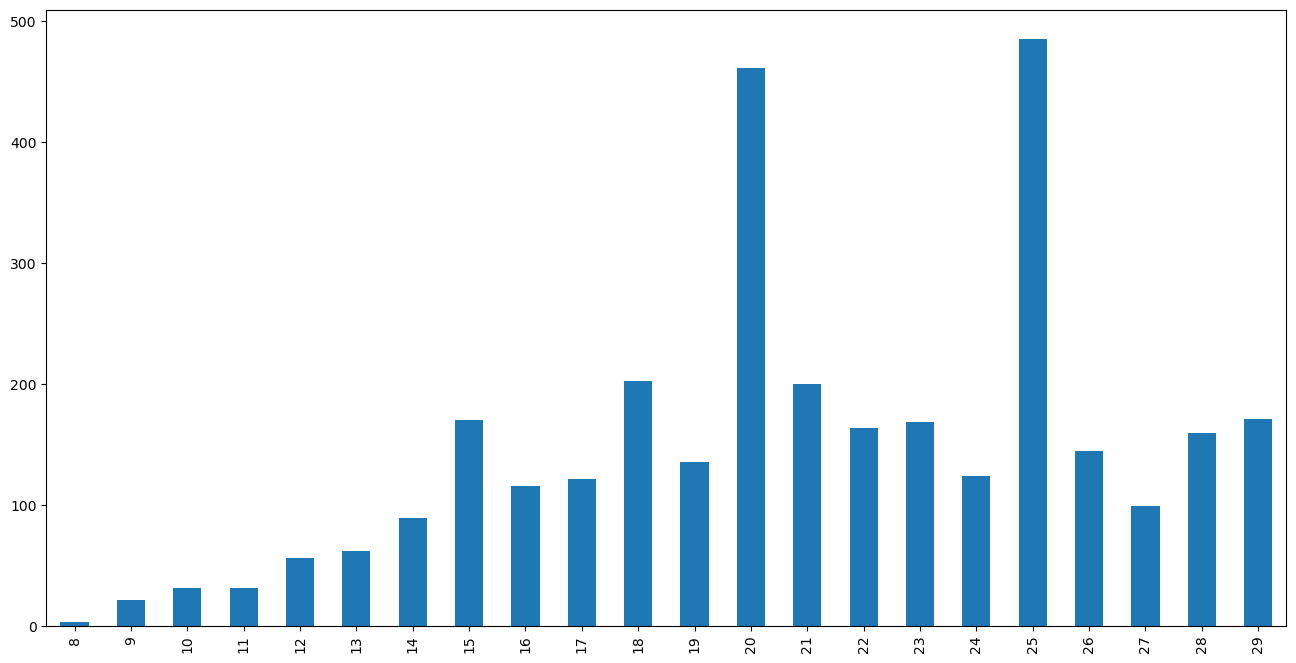

In [32]:
#Revisamos los valores de precio cercanos a cero

plt.figure(figsize=(16,8))
listings.price.loc[listings.price < 30].value_counts().sort_index().plot.bar()
plt.xticks(size = 10);

In [33]:
# Hay un pico en 20 euros, y parece que por debajo de esa cantidad sería difícil obtener rentabilidad, 
# así que vamos a descartar los inmuebles que se alquilan por debajo de 20 euros
listings = listings.loc[listings.price > 19]

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,2,180
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,5,222
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,1,115
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,1,349
...,...,...,...,...,...,...,...,...,...,...,...,...
18904,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,87,358
18905,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,87,358
18906,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,87,358
18907,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,87,358


### Calidad de datos de listings_det

In [34]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         18909 non-null  int64  
 1   id                                            18909 non-null  int64  
 2   listing_url                                   18909 non-null  object 
 3   scrape_id                                     18909 non-null  int64  
 4   last_scraped                                  18909 non-null  object 
 5   name                                          18906 non-null  object 
 6   description                                   17854 non-null  object 
 7   neighborhood_overview                         10997 non-null  object 
 8   picture_url                                   18908 non-null  object 
 9   host_id                                       18909 non-null 

In [35]:
# me quedo solo con algunas variables

a_incluir = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location'
             ]

listings_det = listings_det.loc[:,a_incluir]
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18909 non-null  int64  
 1   description                  17854 non-null  object 
 2   host_is_superhost            18883 non-null  object 
 3   accommodates                 18909 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     17475 non-null  float64
 6   beds                         18568 non-null  float64
 7   number_of_reviews            18909 non-null  int64  
 8   review_scores_rating         13877 non-null  float64
 9   review_scores_communication  13640 non-null  float64
 10  review_scores_location       13637 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.6+ MB


#### Analsis de tipos de datos

In [37]:
# llevo la variable 'host_is_superhost' a categorica (para pasarla a boolean tendria que cambiar los valores)
listings_det['host_is_superhost'] = listings_det['host_is_superhost'].astype('category')
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     17475 non-null  float64 
 6   beds                         18568 non-null  float64 
 7   number_of_reviews            18909 non-null  int64   
 8   review_scores_rating         13877 non-null  float64 
 9   review_scores_communication  13640 non-null  float64 
 10  review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 1.5+ MB


#### Analisis de nulos

In [38]:
listings_det.isna().sum()

id                                 0
description                     1055
host_is_superhost                 26
accommodates                       0
bathrooms                      18909
bedrooms                        1434
beds                             341
number_of_reviews                  0
review_scores_rating            5032
review_scores_communication     5269
review_scores_location          5272
dtype: int64

In [40]:
# elimino la variable 'bathrooms'
listings_det = listings_det.drop(columns = 'bathrooms')
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18909 entries, 0 to 18908
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           18909 non-null  int64   
 1   description                  17854 non-null  object  
 2   host_is_superhost            18883 non-null  category
 3   accommodates                 18909 non-null  int64   
 4   bedrooms                     17475 non-null  float64 
 5   beds                         18568 non-null  float64 
 6   number_of_reviews            18909 non-null  int64   
 7   review_scores_rating         13877 non-null  float64 
 8   review_scores_communication  13640 non-null  float64 
 9   review_scores_location       13637 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.3+ MB


In [41]:
# Vamos a ver si podemos hacer una imputación de beds a partir del número de personas que se pueden acomodar.
pd.crosstab(listings_det.beds, listings_det.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
0.0,222,259,41,68,15,12,5,3,0,2,0,0,0,0,0,1
1.0,2765,4911,399,639,14,9,0,3,0,2,0,0,0,0,0,9
2.0,120,1110,1016,2277,125,148,3,3,0,1,0,0,1,0,0,1
3.0,18,75,231,925,395,582,18,26,1,1,0,0,0,0,0,0
4.0,20,28,32,216,214,498,73,92,3,9,0,1,0,0,0,0
5.0,2,5,6,20,42,178,75,94,9,30,2,2,0,1,0,0
6.0,14,9,2,5,7,62,21,61,9,18,4,8,2,0,0,0
7.0,0,1,0,2,2,6,10,19,8,17,2,6,1,4,0,0
8.0,3,2,0,0,3,2,0,21,3,18,2,9,2,2,1,0


Parece que sí podríamos hacer una asignación mas o menos directa. Leyendo la matriz en vertical vemos que:

* una o dos personas se suelen corresponder con una cama
* tres o cuatro personas se suelen corresponder con dos camas
* cinco o seis personas se suelen corresponder con tres camas
* a más de 6 personas le vamos a poner cuatro camas

In [42]:
#Repasamos el número de nulos y la frecuencia de cada valor
listings_det['beds'].value_counts(dropna = False)

1.0     8751
2.0     4805
3.0     2272
4.0     1186
0.0      628
5.0      466
NaN      341
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

In [46]:
#Creamos una función para imputar los nulos de beds en base a accommodates

def imputar_nulos(registro):
    #Lista de condiciones
    condiciones = [(registro.accommodates <= 2),
               (registro.accommodates > 2) & (registro.accommodates <= 4),
               (registro.accommodates > 4) & (registro.accommodates <= 6),
               (registro.accommodates > 6)]
    #Lista de resultados
    resultados = [1,2,3,4]
    #Salida
    return(np.select(condiciones,resultados, default = -999))

#Imputación a nivel de columnas de los registros de 'beds' donde son NA
listings_det.loc[listings_det.beds.isna(),'beds'] = \
        listings_det.loc[listings_det.beds.isna()].apply(imputar_nulos, axis = 1).astype('float64')

In [47]:
listings_det['beds'].value_counts(dropna = False)

1.0     9061
2.0     4828
3.0     2276
4.0     1190
0.0      628
5.0      466
6.0      222
7.0       78
8.0       68
10.0      39
9.0       20
14.0       6
11.0       6
12.0       5
16.0       5
13.0       4
18.0       2
17.0       2
15.0       1
23.0       1
24.0       1
Name: beds, dtype: int64

Imputacion de nulos en habitaciones (proxy de m2)

In [49]:
listings_det.bedrooms.value_counts(dropna = False)

1.0     12212
2.0      3562
NaN      1434
3.0      1233
4.0       311
5.0       105
6.0        24
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

In [48]:
#analizo correlacion entre nro de camas y nro de habitaciones para imputar los nulos en habitaciones
pd.crosstab(listings_det.bedrooms, listings_det.beds, dropna=False)

beds,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,23.0,24.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,451,8038,3039,459,139,15,36,1,13,1,...,0,1,0,1,0,0,0,0,0,0
2.0,65,108,1372,1329,532,110,33,7,5,0,...,0,0,0,0,0,0,0,1,0,0
3.0,7,28,22,414,393,242,80,25,11,7,...,2,0,0,0,0,0,0,0,0,0
4.0,6,23,3,7,95,63,56,27,19,6,...,2,2,0,0,0,0,0,0,0,0
5.0,1,14,0,0,2,26,10,16,17,2,...,1,1,2,1,0,2,0,1,0,0
6.0,2,4,0,0,0,0,6,0,2,3,...,0,1,1,0,0,1,1,0,0,0
7.0,0,0,1,0,1,0,0,1,1,0,...,0,0,1,3,1,1,1,0,0,0
8.0,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Imputacion de bedrooms a partir de habitaciones

* cero, una o dos camas se suele corresponder con una habitación
* tres o cuatro camas se suele corresponder con dos habitaciones
* cinco o seis camas se suele corresponder con tres habitaciones
* a más camas le vamos a poner cuatro habitaciones

In [51]:
def imputar_nulos(registro):
    #Lista de condiciones
    condiciones = [(registro.beds <= 2),
               (registro.beds > 2) & (registro.beds <= 4),
               (registro.beds > 4) & (registro.beds <= 6),
               (registro.beds > 6)]

    #Lista de resultados
    resultados = [1,2,3,4]
    
    #Salida
    return(np.select(condiciones,resultados, default = -999))

#Imputación
listings_det.loc[listings_det.bedrooms.isna(),'bedrooms'] = \
    listings_det.loc[listings_det.bedrooms.isna()].apply(imputar_nulos, axis = 1).astype('float64')

In [52]:
listings_det.bedrooms.value_counts(dropna = False)

1.0     13540
2.0      3657
3.0      1244
4.0       311
5.0       105
6.0        24
7.0        11
8.0         7
9.0         3
10.0        3
14.0        2
15.0        1
18.0        1
Name: bedrooms, dtype: int64

#### Analisis de duplicados

In [53]:
listings_det.duplicated().sum()

0

#### Analisis de variables categoricas

In [54]:
listings_det.host_is_superhost.value_counts()

f    15423
t     3460
Name: host_is_superhost, dtype: int64

#### Analisis de variables numericas

In [55]:
listings_det.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
id,18909.0,3.055841e+07,1.448889e+07,6369.0,19305558.00,33537761.00,42555334.00,52182334.0
accommodates,18909.0,3.094928e+00,1.963715e+00,0.0,2.00,2.00,4.00,16.0
bedrooms,18909.0,1.414670e+00,8.116969e-01,1.0,1.00,1.00,2.00,18.0
beds,18909.0,1.909197e+00,1.444317e+00,0.0,1.00,1.00,2.00,24.0
number_of_reviews,18909.0,3.270612e+01,6.524996e+01,0.0,0.00,5.00,32.00,744.0
review_scores_rating,13877.0,4.549404e+00,7.834379e-01,0.0,4.50,4.75,4.94,5.0
review_scores_communication,13640.0,4.776612e+00,4.632929e-01,1.0,4.75,4.92,5.00,5.0
review_scores_location,13637.0,4.788151e+00,3.774844e-01,1.0,4.73,4.92,5.00,5.0


### Datamart analitico

In [56]:
# merge de las tablas listings y listings_det
df = pd.merge(left = listings, right = listings_det, how = 'left', on = 'id')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,...,180,Excellent connection with the AIRPORT and EXHI...,t,2,1.0,1.0,80,4.87,4.89,4.77
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,...,364,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,33,4.58,4.82,4.21
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,...,222,"Apartamento de tres dormitorios dobles, gran s...",f,6,3.0,5.0,0,NaN,NaN,NaN
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,...,115,"Studio located 50 meters from Gran Via, next t...",f,3,1.0,1.0,12,4.92,5.00,5.00
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,...,349,Nice and cozy roon for one person with a priva...,f,1,1.0,1.0,149,4.68,4.71,4.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,...,358,ROOM - 8 sqm. • 1st Floor <br /> <br />cozy ro...,f,1,1.0,0.0,0,NaN,NaN,NaN
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,...,358,ROOM - 10 sqm. • 4th Floor <br /> <br />cozy r...,f,1,1.0,0.0,0,NaN,NaN,NaN
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,...,358,ROOM <br /> <br />cozy room in madrid centro i...,f,1,1.0,0.0,0,NaN,NaN,NaN
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,...,358,ROOM -9 sqm. • 1st Floor <br /> <br />cozy roo...,f,1,1.0,0.0,0,NaN,NaN,NaN


Para unir df con la tabla precio_m2, tengo que ver que los valores de los distritos coincidan, porque voy a hacer el merge por ese campo

In [57]:
# neighbourhood_group es una variable categórica
pd.Series(df.neighbourhood_group.unique().categories).sort_values()

0                Arganzuela
1                   Barajas
2               Carabanchel
3                    Centro
4                 Chamartín
5                  Chamberí
6             Ciudad Lineal
7     Fuencarral - El Pardo
8                 Hortaleza
9                    Latina
10        Moncloa - Aravaca
11                Moratalaz
12       Puente de Vallecas
13                   Retiro
14                Salamanca
15    San Blas - Canillejas
16                   Tetuán
17                    Usera
18                Vicálvaro
19        Villa de Vallecas
20               Villaverde
dtype: object

In [62]:
precio_m2.distrito.drop_duplicates().sort_values()

1             Arganzuela
2                Barajas
3            Carabanchel
4                 Centro
5              Chamartín
6               Chamberí
7          Ciudad Lineal
8             Fuencarral
9              Hortaleza
10                Latina
11               Moncloa
12             Moratalaz
13    Puente de Vallecas
14                Retiro
15             Salamanca
16              San Blas
17                Tetuán
18                 Usera
19             Vicálvaro
20     Villa de Vallecas
21            Villaverde
Name: distrito, dtype: object

Comparando parece todo igual excepto:

* Fuencarral - El Pardo
* Moncloa - Aravaca
* San Blas - Canillejas

Por tanto vamos a reemplazar estos valores en precio_m2 para que sean iguales a los de df y podamos cruzarlos

In [64]:
precio_m2.distrito = precio_m2.distrito.map({'Fuencarral':'Fuencarral - El Pardo',
                        'Moncloa':'Moncloa - Aravaca',
                        'San Blas':'San Blas - Canillejas'}) \
                    .fillna(precio_m2.distrito)
# pongo el fillna porque los que el map rellena con NA los que no coinciden con el diccionario
precio_m2

,m2_price,distrito
1,4085,Arganzuela
2,3409,Barajas
3,2123,Carabanchel
4,4827,Centro
5,5098,Chamartín
6,5381,Chamberí
7,2940,Ciudad Lineal
8,3568,Fuencarral - El Pardo
9,3871,Hortaleza
10,2267,Latina


Ahora hago merge de los dos dataframe

In [65]:
# como las claves se llaman distinto, tengo que usar los parámetros left_on y right_on
df = pd.merge(left = df, right = precio_m2, how = 'left', left_on='neighbourhood_group', right_on='distrito')
df

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,m2_price,distrito
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.457240,-3.676880,Private room,60,1,...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,21853,Bright and airy room,83531,Latina,Cármenes,40.403810,-3.741300,Private room,31,4,...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.388400,-3.695110,Entire home/apt,50,15,...,f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.421830,-3.705290,Entire home/apt,92,5,...,f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.389750,-3.690180,Private room,26,2,...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17705,52182264,Enormous Private Room in 12-Bedroom Unit - los...,378060726,Centro,Justicia,40.424384,-3.691216,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17706,52182273,Stunning Private Room in 11-Bedroom Unit - los...,378060726,Centro,Justicia,40.424447,-3.691309,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17707,52182303,Classic Private Room in 7-Bedroom Unit - los 3...,378060726,Centro,Justicia,40.424989,-3.691783,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,4827,Centro
17708,52182321,Elegant Private Room in 12-Bedroom Unit - los ...,378060726,Salamanca,Recoletos,40.424352,-3.690211,Private room,29,1,...,f,1,1.0,0.0,0,NaN,NaN,NaN,6114,Salamanca


In [67]:
# por las dudas de que no hayan pasado cosas raras en el join, hago un conteo de nulos
df.m2_price.isna().sum()

0

#### Guardo el tablón analítico en la base de datos

In [68]:
df.to_sql('df', con = con, if_exists = 'replace')

17710

### Preparación de datos

Traigo el tablón analítico desde la base de datos

In [69]:
df = pd.read_sql('df', con = con)
df.head()

,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,m2_price,distrito
0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,...,t,2,1.0,1.0,80,4.87,4.89,4.77,5098,Chamartín
1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,31,...,f,1,1.0,1.0,33,4.58,4.82,4.21,2267,Latina
2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,50,...,f,6,3.0,5.0,0,NaN,NaN,NaN,4085,Arganzuela
3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,92,...,f,3,1.0,1.0,12,4.92,5.00,5.00,4827,Centro
4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,26,...,f,1,1.0,1.0,149,4.68,4.71,4.70,4085,Arganzuela


#### Preparacion de variables

#####  Creacion de kpis de palancas
Habíamos dicho que eran 3:

- precio por noche: esta ya la tenemos directamente en la variable price, pero vamos a revisarla para ver que la entendemos bien
- ocupación: tenemos availability_365 pero hay que transformarla
- precio del inmueble: esta tendremos que crearla con variables externas así que la dejamos para después

Empezamos con el precio.

La documentación no aclara si el precio es por todo el inmueble, o si en el caso de que se alquile una habitación es por habitación.

Es un dato clave para poder hacer la valoración de los potenciales ingresos de un inmueble.

Vamos a intentar entenderlo analizando el precio medio por tipo de alquiler.

Es importante filtrar por solo un distrito para no incluir el efecto "zona".

Así que primero elegimos un distrito que tenga muchos datos, para que tenga mayor valor estadistico

In [70]:
df.distrito.value_counts()

Centro                   8127
Salamanca                1218
Chamberí                 1089
Arganzuela               1005
Tetuán                    762
Retiro                    618
Carabanchel               581
Chamartín                 538
Ciudad Lineal             532
Moncloa - Aravaca         493
Puente de Vallecas        465
San Blas - Canillejas     463
Latina                    455
Hortaleza                 354
Fuencarral - El Pardo     265
Usera                     233
Barajas                   142
Villaverde                129
Moratalaz                  94
Villa de Vallecas          90
Vicálvaro                  57
Name: distrito, dtype: int64

In [71]:
# elijo Centro que es el que tiene mas registros
df.loc[df.distrito == 'Centro',:].groupby('room_type').price.mean()

room_type
Entire home/apt    148.859980
Private room        67.131643
Shared room         60.464286
Name: price, dtype: float64

Comprobamos que el precio en la variable "price" es por habitacion.

Por tanto para calcular los "ingresos" de un inmueble sí deberemos multiplicar el precio el precio por el número de habitaciones cuando sea de los tipos Private room o Shared room

Ahora bien, multiplicar el precio por el total de habitaciones puede sesgar artificialmente al alza la capacidad de generar ingresos de un inmueble.

Ya que si se alquila por habitaciones no es probable que siempre esté al 100%

Por tanto deberíamos ponderarlo por el porcentaje medio de habitaciones alquiladas.

No tenemos ese dato, pero supongamos que hemos hablado con el responsable de negocio y nos ha dicho que es del 70%.

Podemos crear la variable precio total aplicando apply sobre una función personalizada.

In [77]:
def crear_precio_total(registro):
    if (registro.bedrooms > 1) & ((registro.room_type == 'Private room') | (registro.room_type == 'Shared room')):
        salida = registro.price * registro.beds * 0.7
    else:
        salida = registro.price
    return(salida)


df['precio_total'] = df.apply(crear_precio_total, axis=1)

In [84]:
df[['price','bedrooms','precio_total', 'room_type']]


,price,bedrooms,precio_total,room_type
0,60,1.0,60.0,Private room
1,31,1.0,31.0,Private room
2,50,3.0,50.0,Entire home/apt
3,92,1.0,92.0,Entire home/apt
4,26,1.0,26.0,Private room
...,...,...,...,...
17705,29,1.0,29.0,Private room
17706,29,1.0,29.0,Private room
17707,29,1.0,29.0,Private room
17708,29,1.0,29.0,Private room


Ahora creamos la variable ocupacion

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           17710 non-null  int64  
 1   id                              17710 non-null  int64  
 2   name                            17707 non-null  object 
 3   host_id                         17710 non-null  int64  
 4   neighbourhood_group             17710 non-null  object 
 5   neighbourhood                   17710 non-null  object 
 6   latitude                        17710 non-null  float64
 7   longitude                       17710 non-null  float64
 8   room_type                       17710 non-null  object 
 9   price                           17710 non-null  int64  
 10  minimum_nights                  17710 non-null  int64  
 11  calculated_host_listings_count  17710 non-null  int64  
 12  availability_365                

In [88]:
df['ocupacion'] = (100*((365-df.availability_365)/365)).astype(int)

##### Transformación de variables de análisis

Algunas de las preguntas semilla están dirigidas a comprobar cómo se comporta el precio o la ocupación según otras variables de análisis como el número de habitaciones, la media de valoraciones, etc.

Normalmente podremos hacer mejor estos análisis si discretizamos la variable de análisis.

En nuestro caso las candidatas para este análisis son: accommodates, bedrooms, beds y number_of_reviews.

**Discretizar bedrooms**

In [90]:
condiciones = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms > 3]

resultados = ['01_Una','02_Dos','03_Tres','04_Cuatro o mas']

df['bedrooms_disc'] = np.select(condiciones, resultados, default = -999)

In [91]:
df['bedrooms_disc'].value_counts()

01_Una             12422
02_Dos              3617
03_Tres             1228
04_Cuatro o mas      443
Name: bedrooms_disc, dtype: int64

**Discretizar accommodates, beds y number_of_reviews**

Vamos a usar qcut para discritizar con percentiles 0.5, 0.8, 1

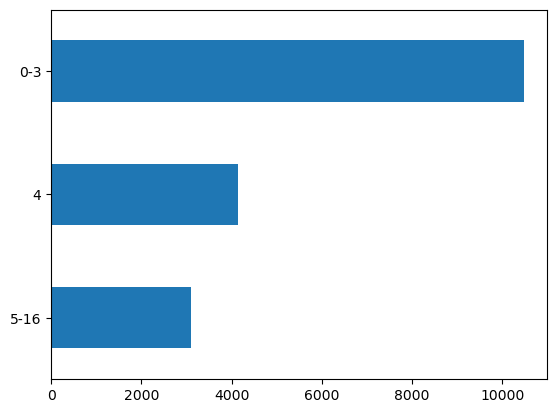

In [92]:
cortes = [0, 0.5, 0.8, 1]
valores = ['0-3','4','5-16']
df['accommodates_disc'] = pd.qcut(df['accommodates'], cortes, labels = valores)

df['accommodates_disc'].value_counts().sort_index(ascending = False).plot.barh();

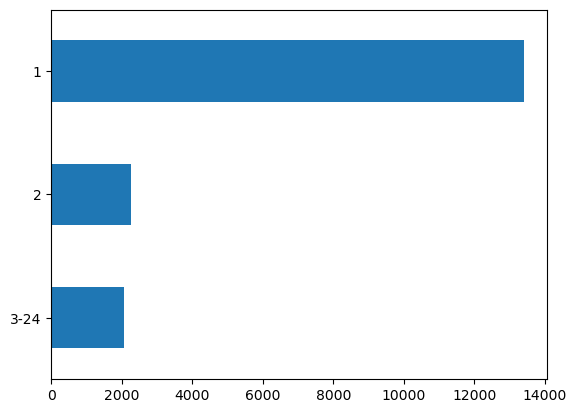

In [93]:
valores = ['1','2','3-24']

df['beds_disc'] = pd.qcut(df['beds'], cortes, labels = valores)

df['beds_disc'].value_counts().sort_index(ascending = False).plot.barh();

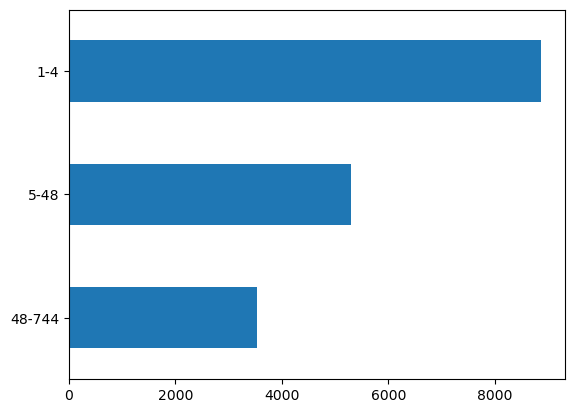

In [94]:
valores = ['1-4','5-48','48-744']

df['number_of_reviews_disc'] = pd.qcut(df['number_of_reviews'], cortes, labels = valores)

df['number_of_reviews_disc'].value_counts().sort_index(ascending = False).plot.barh();

##### Creación de variables con datos externos

Lo que queremos incorporar es la palanca del precio del inmueble.

Decíamos que la podíamos estimar multiplicando los metros cuadrados del inmueble por el precio por m2. Como proxy de la superficie del inmueble vamos a usar el nro de habitaciones

**Estimación de los metros cuadrados del inmueble**

Vamos usar el siguiente algoritmo:

* una habitación: m2 = 50
* dos habitaciones: m2 = 70
* tres habitaciones: m2 = 90
* cuatro habitaciones: m2 = 120
* cinco o más habitaciones: m2 = 150

In [95]:
condiciones = [df.bedrooms == 1,
               df.bedrooms == 2,
               df.bedrooms == 3,
               df.bedrooms == 4,
               df.bedrooms > 4]

resultados = [50,70,90,120,150]

df['m2'] = np.select(condiciones, resultados, default = -999)

Ahora ya podemos estimar el precio de compra del inmueble.

Recordamos que al precio que nos sale le quitábamos un 30% por capacidad de negociación.

In [96]:
df['precio_compra'] = df.m2 * df.m2_price * 0.7

In [98]:
df[['bedrooms','m2','distrito','m2_price','precio_compra']].head(20)

,bedrooms,m2,distrito,m2_price,precio_compra
0,1.0,50,Chamartín,5098,178430.0
1,1.0,50,Latina,2267,79345.0
2,3.0,90,Arganzuela,4085,257355.0
3,1.0,50,Centro,4827,168945.0
4,1.0,50,Arganzuela,4085,142975.0
5,3.0,90,Arganzuela,4085,257355.0
6,1.0,50,Centro,4827,168945.0
7,1.0,50,Centro,4827,168945.0
8,2.0,70,Centro,4827,236523.0
9,1.0,50,Centro,4827,168945.0


**Cálculo de la distancia de cada inmueble a la Puerta del Sol**

Ahora se va a hallar la distancia a un Punto de Interés (pdi). En este caso, la Puerta del Sol de Madrid (Latitud: 40.4167278 Longitud: -3.7033387).

Dada la curvatura de la tierra la distancia entre dos puntos a partir de su latitud y longitud se calcula con una fórmula que se llama distancia de Haversine.

In [100]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6372.8 #En km, si usas millas tienes que cambiarlo por 3959.87433

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [102]:
#Las coordenadas de la Puerta del Sol serán lat1 y lon1
lat1 = 40.4167278
lon1 = -3.7033387

#creo la variable pdi_sol

df['pdi_sol'] = df.apply(lambda registro: haversine(lat1,lon1,registro.latitude,registro.longitude), axis = 1)

In [105]:
# verifico distancia pdi por distrito
df.groupby('distrito').pdi_sol.mean().sort_values()

distrito
Centro                    0.730611
Arganzuela                1.939114
Chamberí                  2.133167
Retiro                    2.450593
Salamanca                 2.715975
Moncloa - Aravaca         3.294526
Usera                     3.928874
Latina                    3.942634
Carabanchel               3.970238
Chamartín                 4.432842
Puente de Vallecas        4.481127
Tetuán                    4.624605
Moratalaz                 5.073901
Ciudad Lineal             5.231293
Villaverde                7.664192
Fuencarral - El Pardo     8.062301
Hortaleza                 8.074184
San Blas - Canillejas     8.199011
Vicálvaro                 8.599559
Villa de Vallecas         9.176618
Barajas                  11.439064
Name: pdi_sol, dtype: float64

#### Guardo nuevo tablón analítico

In [106]:
# lo guardo en la BD como una tabla denominada df_preparado

df.to_sql('df_preparado', con = con, if_exists = 'replace')

17710

### Análisis e Insights

In [107]:
# cargo el df_preparado en la BD como df

df = pd.read_sql('df_preparado', con = con)
df.head()

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,...,distrito,precio_total,ocupacion,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol
0,0,0,6369,"Rooftop terrace room , ensuite bathroom",13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,...,Chamartín,60.0,50,01_Una,0-3,1,48-744,50,178430.0,5.032039
1,1,1,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,...,Latina,31.0,0,01_Una,0-3,1,5-48,50,79345.0,3.521406
2,2,2,23001,Apartmento Arganzuela- Madrid Rio,82175,Arganzuela,Legazpi,40.38840,-3.69511,Entire home/apt,...,Arganzuela,50.0,39,03_Tres,5-16,3-24,1-4,90,257355.0,3.226963
3,3,3,24805,Gran Via Studio Madrid,346366726,Centro,Universidad,40.42183,-3.70529,Entire home/apt,...,Centro,92.0,68,01_Una,0-3,1,5-48,50,168945.0,0.591065
4,4,4,26825,Single Room whith private Bathroom,114340,Arganzuela,Legazpi,40.38975,-3.69018,Private room,...,Arganzuela,26.0,4,01_Una,0-3,1,48-744,50,142975.0,3.200942


#### Análisis de la palanca precio (de alquiler)

In [108]:
# hago un análisis estadístico de la variables precio_total, que es el precio de alquiler total del inmbueble
df.precio_total.describe()

count    17710.0000
mean       144.4007
std        518.4074
min          0.0000
25%         41.0000
50%         68.0000
75%        110.0000
max      22400.0000
Name: precio_total, dtype: float64

Vemos que hay al menos un atípico por la parte de arriba que sesga la media, y la std es muhco mayor que la media (mean). Por tanto vamos a usar la mediana como medida de centralización más fiable.

Analizo la mediana de precio de alquiler por distrito

In [111]:
df.groupby('distrito').precio_total.median().sort_values(ascending=False)

distrito
Salamanca                87.75
San Blas - Canillejas    86.00
Centro                   75.00
Chamartín                70.00
Chamberí                 70.00
Hortaleza                67.00
Retiro                   65.00
Tetuán                   65.00
Moncloa - Aravaca        60.00
Fuencarral - El Pardo    60.00
Arganzuela               57.00
Ciudad Lineal            49.00
Vicálvaro                47.60
Carabanchel              46.00
Barajas                  45.50
Villa de Vallecas        45.50
Latina                   45.00
Usera                    41.00
Moratalaz                40.00
Puente de Vallecas       40.00
Villaverde               39.00
Name: precio_total, dtype: float64

Comparamos el precio medio por distrito con el precio medio de compra también por distrito.

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17710 entries, 0 to 17709
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   level_0                         17710 non-null  int64  
 1   index                           17710 non-null  int64  
 2   id                              17710 non-null  int64  
 3   name                            17707 non-null  object 
 4   host_id                         17710 non-null  int64  
 5   neighbourhood_group             17710 non-null  object 
 6   neighbourhood                   17710 non-null  object 
 7   latitude                        17710 non-null  float64
 8   longitude                       17710 non-null  float64
 9   room_type                       17710 non-null  object 
 10  price                           17710 non-null  int64  
 11  minimum_nights                  17710 non-null  int64  
 12  calculated_host_listings_count  

In [116]:
temp = df.groupby('distrito')[['precio_total', 'precio_compra']].median()
temp

,precio_total,precio_compra
distrito,,
Arganzuela,57.00,142975.0
Barajas,45.50,119315.0
Carabanchel,46.00,74305.0
Centro,75.00,168945.0
Chamartín,70.00,178430.0
Chamberí,70.00,188335.0
Ciudad Lineal,49.00,102900.0
Fuencarral - El Pardo,60.00,124880.0
Hortaleza,67.00,135485.0


Hago un scatter plot para ver la relacion entre precio total y precio de compra

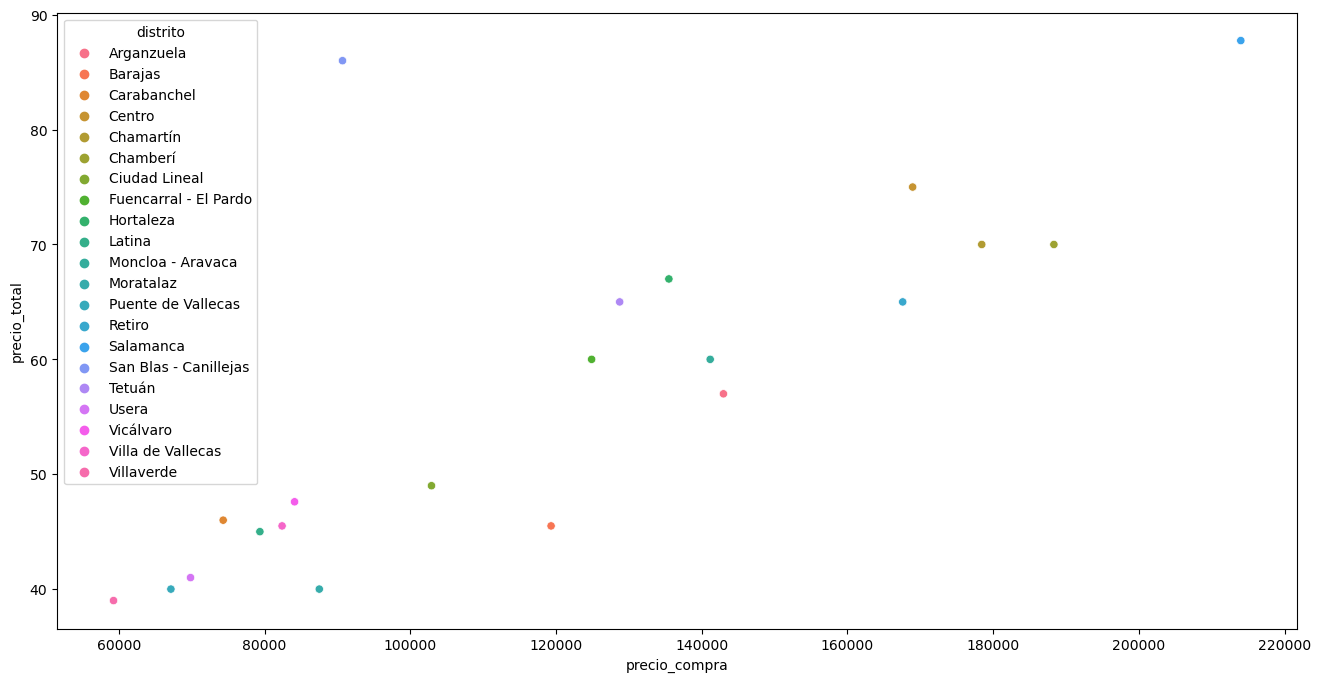

In [118]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total', hue='distrito');

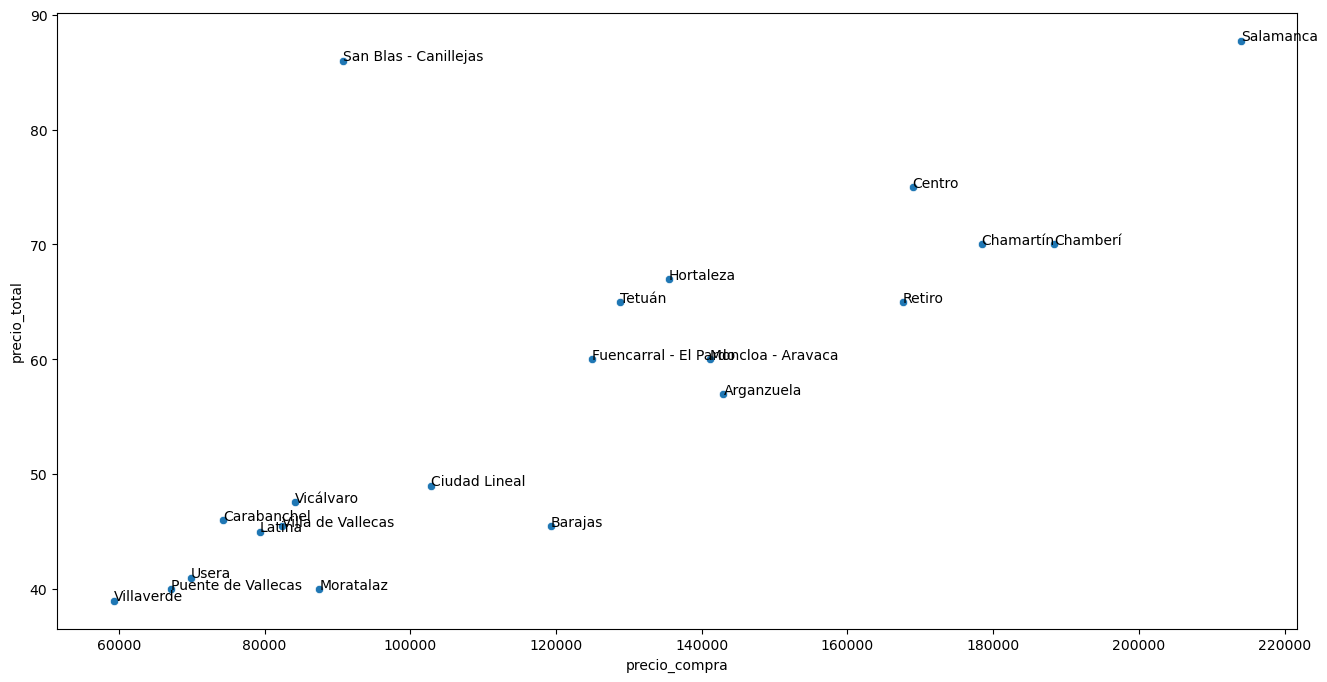

In [120]:
plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total');
#Para verlo con las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

Salvo San Blas (con alquileres altos puntuales por cercanina al Wanda por la final de la champions), todos tienen una relacion lineal entre precio de compra y precio de alquiler, destacandose 3 clusters de distritos

**Insight 1: pueden existir inmuebles con un valor regular residual pero con alto valor en momentos puntuales por acontenicimientos deportivos o espectáculos**

Ahora hago un analisis por barrio en vez de por distrito

In [122]:
temp = df.groupby('neighbourhood')[['precio_total', 'precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
Abrantes,35.5,74305.0
Acacias,51.0,142975.0
Adelfas,54.0,234612.0
Aeropuerto,34.0,119315.0
Aguilas,45.0,79345.0
...,...,...
Valverde,62.5,124880.0
Ventas,40.0,102900.0
Vinateros,50.0,87500.0


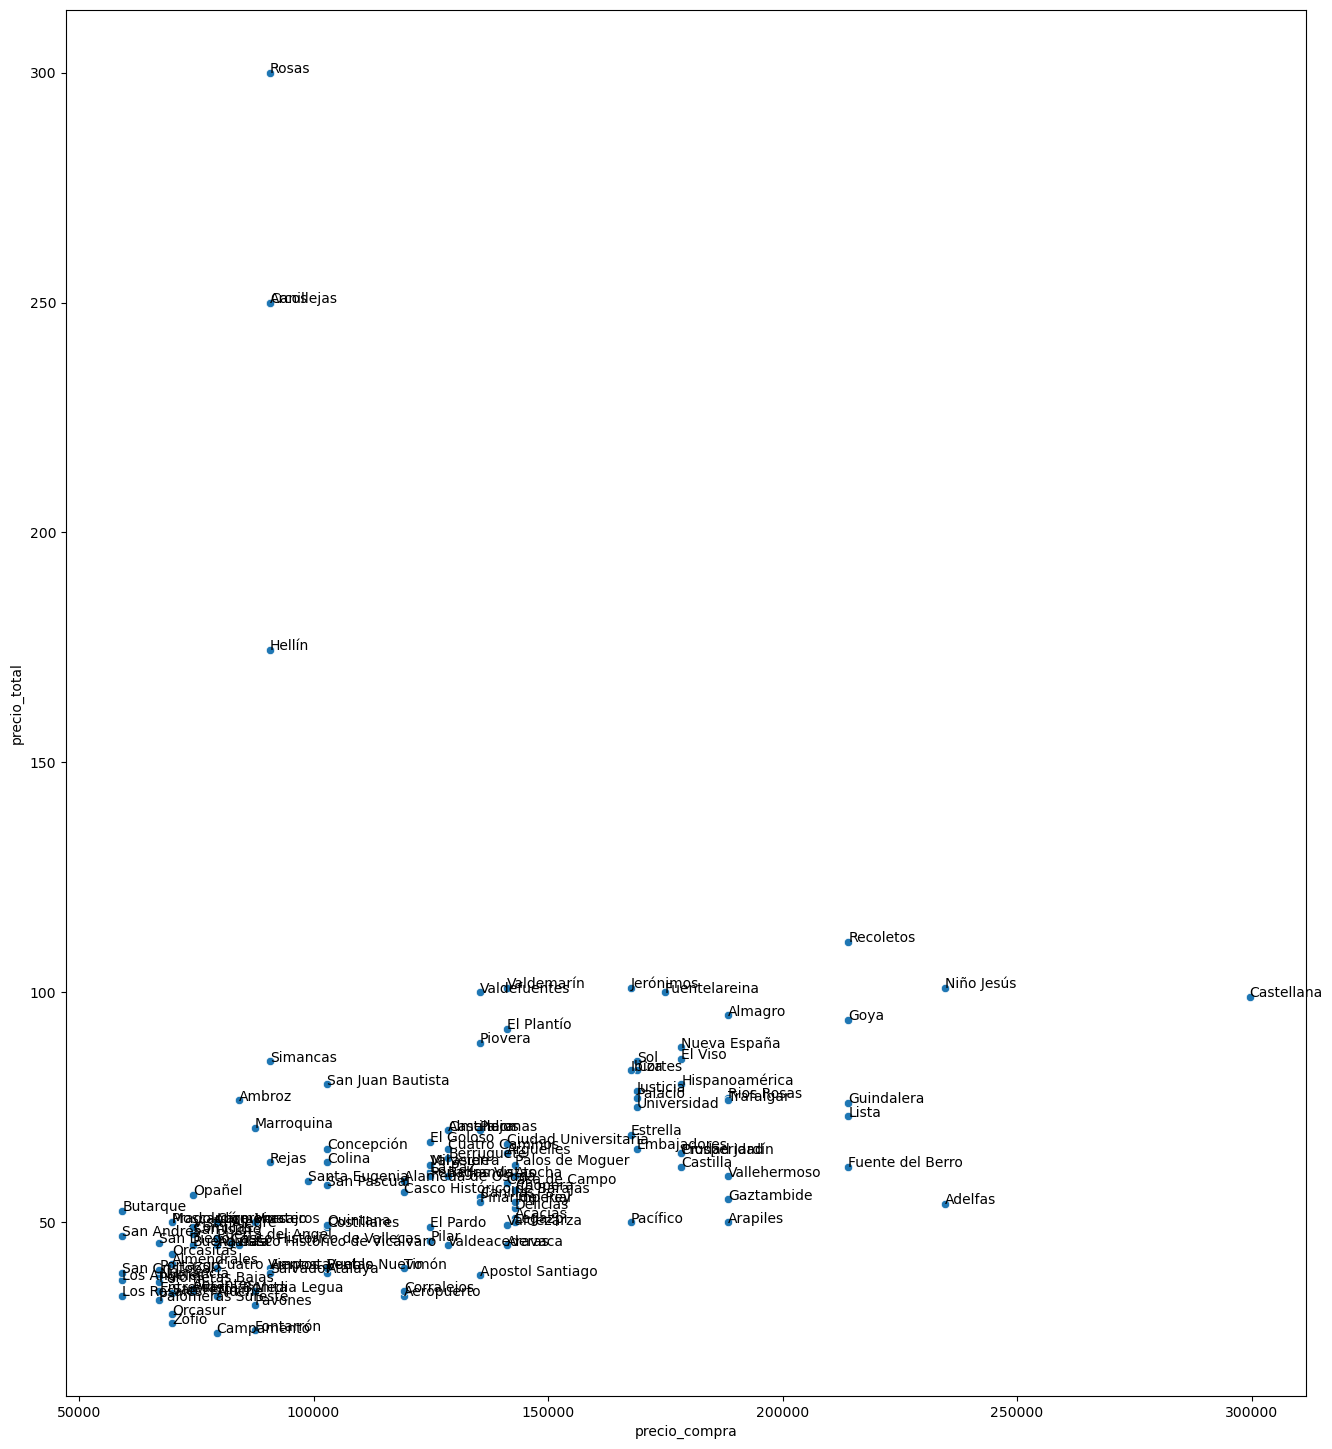

In [123]:
plt.figure(figsize = (16,18))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total');
#Para verlo con las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

A este nivel ya vemos más cosas:

* 3 barrios que sobresalen, posiblemente los 3 sean de San Blas
* Dentro de cada grupo de bajo-medio-alto sí podemos empezar a separar los que tienen precios de alqiler mas altos
    * Bajo: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Medio: El Plantio, Valdemarín, Valdefuentes
    * Medio-alto: Jerónimos, Fuentela reina
    * Alto: Recoletos
    
**Insight 2: Existen ciertos barrios que apriori pueden maximizar la relación coste-ingresos y además podemos segmentarlo por el tipo calidad del inmueble en el que nos interes invertir**

**¿Qué factores (a parte de la localización determinan el precio del alquiler?**

Para responder a esta pregunta podemos construir un minicubo, ya que hemos discretizado nuestras variables de análisis.

In [125]:
df.filter(like = 'disc')

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc
0,01_Una,0-3,1,48-744
1,01_Una,0-3,1,5-48
2,03_Tres,5-16,3-24,1-4
3,01_Una,0-3,1,5-48
4,01_Una,0-3,1,48-744
...,...,...,...,...
17705,01_Una,0-3,1,1-4
17706,01_Una,0-3,1,1-4
17707,01_Una,0-3,1,1-4
17708,01_Una,0-3,1,1-4


In [126]:
#Paso 1: Seleccionar qué variables serán la métricas y cuales las dimensiones
metricas = ['precio_total','precio_compra']
dimensiones = ['bedrooms_disc','accommodates_disc','beds_disc','number_of_reviews_disc']

minicubo_precio = df[dimensiones + metricas]
minicubo_precio

,bedrooms_disc,accommodates_disc,beds_disc,number_of_reviews_disc,precio_total,precio_compra
0,01_Una,0-3,1,48-744,60.0,178430.0
1,01_Una,0-3,1,5-48,31.0,79345.0
2,03_Tres,5-16,3-24,1-4,50.0,257355.0
3,01_Una,0-3,1,5-48,92.0,168945.0
4,01_Una,0-3,1,48-744,26.0,142975.0
...,...,...,...,...,...,...
17705,01_Una,0-3,1,1-4,29.0,168945.0
17706,01_Una,0-3,1,1-4,29.0,168945.0
17707,01_Una,0-3,1,1-4,29.0,168945.0
17708,01_Una,0-3,1,1-4,29.0,213990.0


In [127]:
#Paso 2: pasar a transaccional las dimensiones
minicubo_precio = minicubo_precio.melt(id_vars=['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,60.0,178430.0,bedrooms_disc,01_Una
1,31.0,79345.0,bedrooms_disc,01_Una
2,50.0,257355.0,bedrooms_disc,03_Tres
3,92.0,168945.0,bedrooms_disc,01_Una
4,26.0,142975.0,bedrooms_disc,01_Una
...,...,...,...,...
70835,29.0,168945.0,number_of_reviews_disc,1-4
70836,29.0,168945.0,number_of_reviews_disc,1-4
70837,29.0,168945.0,number_of_reviews_disc,1-4
70838,29.0,213990.0,number_of_reviews_disc,1-4


In [130]:
#Paso 3: Agregar las métricas por "variable" y "valor" con las funciones deseadas
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable               value                                       
accommodates_disc      0-3                      49.0       168945.0
                       4                        85.0       168945.0
                       5-16                    126.0       236523.0
bedrooms_disc          01_Una                   55.0       168945.0
                       02_Dos                  100.0       236523.0
                       03_Tres                 140.0       304101.0
                       04_Cuatro o mas         204.0       405468.0
beds_disc              1                        57.0       168945.0
                       2                       100.0       236523.0
                       3-24                    135.0       257355.0
number_of_reviews_disc 1-4                      70.0       168945.0
                       48-744                   66.0       168945.0
                       5-48                     68.0       168945.0

Sobre el minicubo vamos analizando cada variable.

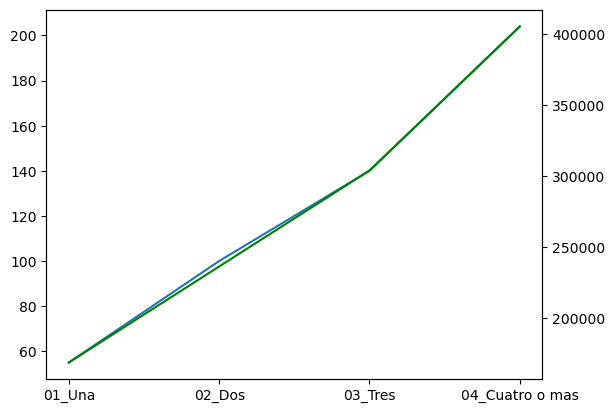

In [131]:
# como tienen escalas distintas los precios, hago un twinx
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_disc'].precio_compra,color = 'green');

En cuanto al número de habitaciones no hay nada que destacar.

Existe una relación casi perfecta entre el precio de compra y el precio total que se puede cobrar.
Parte de este efecto puede ser artificial, ya que usamos el número de habitaciones para calcular el precio total como el precio de compra.

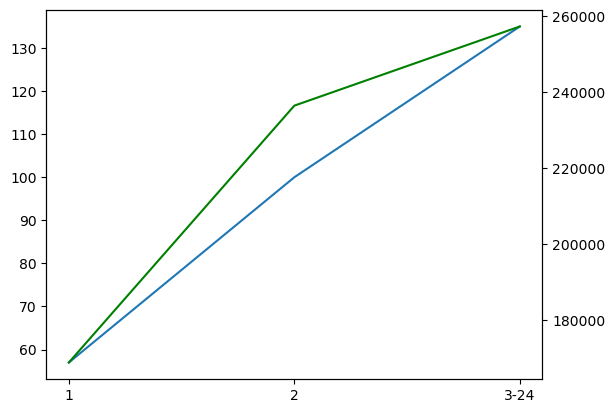

In [132]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra,color = 'green');

En cuanto al número de camas sí hay una conclusión:

**Insight 3: el número de camas a evitar es 2**. O bien ponemos una cama o intentamos meter todas las posibles.

Vamos a analizar ahora por el número de huéspedes que aceptan

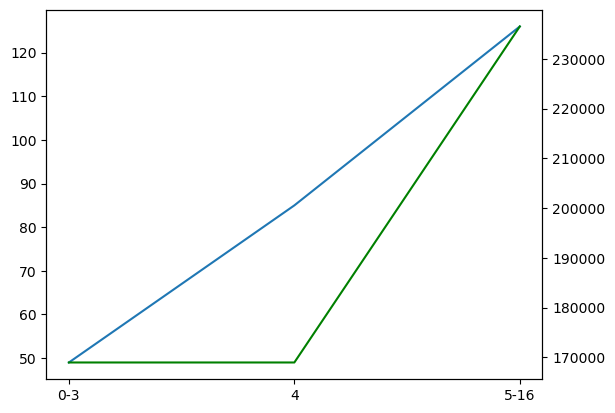

In [135]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

**Insight 4: el número óptimo de huéspedes está en 4, ya el precio de los inmuebles para acomodar 4 es el mismo que para acomodar 1, 2 o 3. A partir de 5 el piso necesita ser mayor y el precio de compra se incrementa bastante**

Por último vamos a analizar la variable que hemos construído de cercanía a un punto de interés para ver si tiene efecto sobre el precio de las habitaciones.

En este caso como hemos construído la distancia a la Puerta del Sol vamos a evaluar solo los distritos para lo que esto puede ser relevante, es decir los más céntricos.

In [141]:
df.groupby('distrito')['pdi_sol'].median().sort_values()

distrito
Centro                    0.728581
Arganzuela                1.817840
Chamberí                  2.078790
Moncloa - Aravaca         2.130135
Retiro                    2.415432
Salamanca                 2.705209
Latina                    3.496952
Carabanchel               3.647956
Usera                     3.661376
Chamartín                 4.233216
Puente de Vallecas        4.233631
Tetuán                    4.572866
Ciudad Lineal             5.170226
Moratalaz                 5.242395
Villaverde                7.579665
Fuencarral - El Pardo     7.738933
San Blas - Canillejas     7.962141
Hortaleza                 8.132864
Vicálvaro                 8.396723
Villa de Vallecas         8.822907
Barajas                  11.593340
Name: pdi_sol, dtype: float64

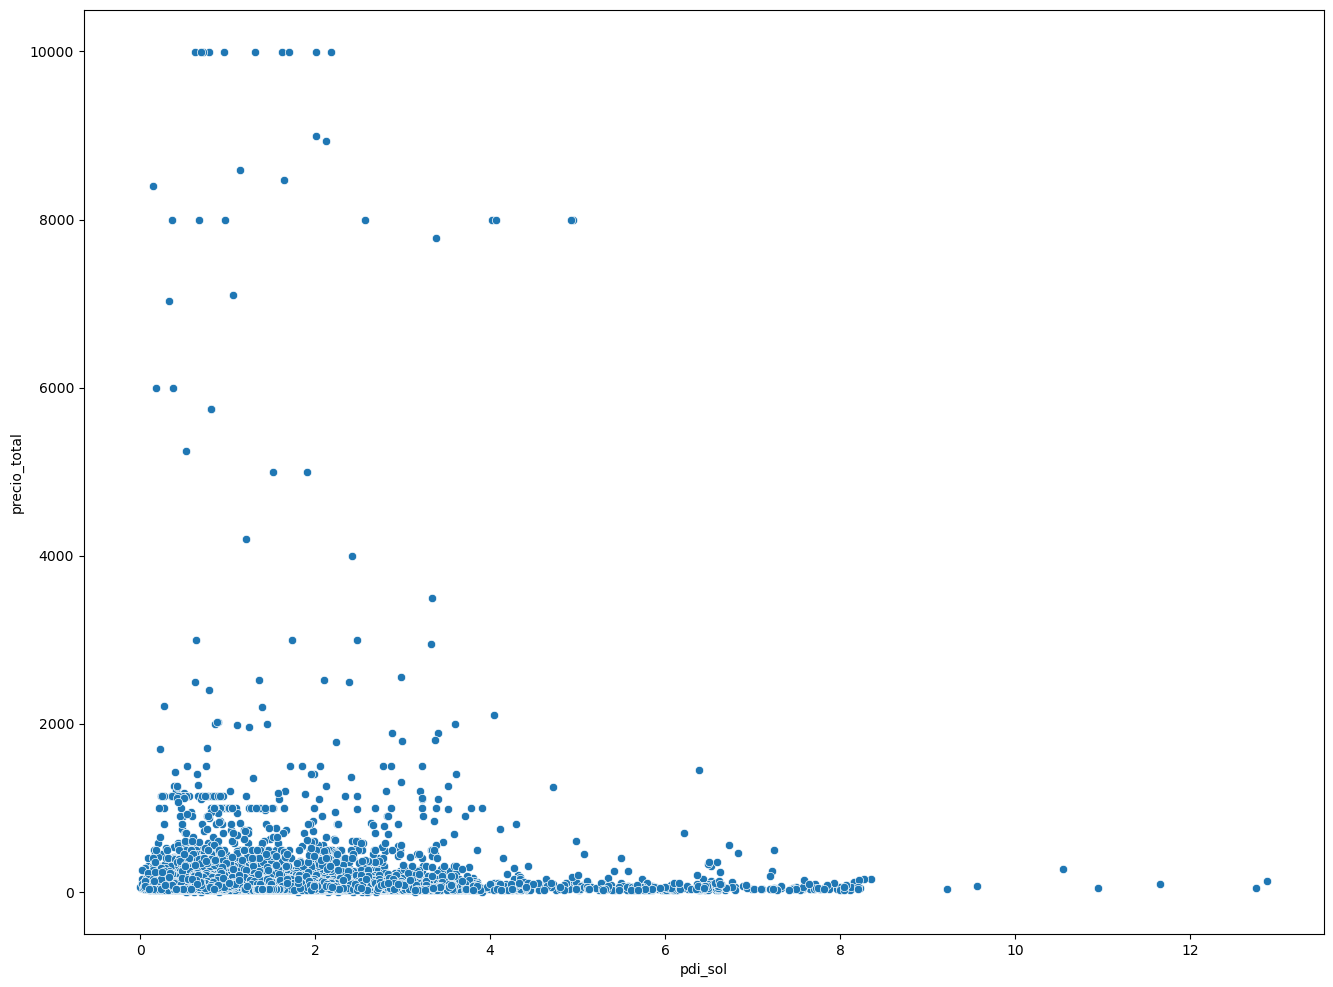

In [142]:
# corto el Latina (posicion 7)
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

No parece haber una relación tan directa como sería esperable entre la distancia a la Puerta del Sol y el precio de alquiler.

**Insight 5: estando dentro del distrito parece que la cercanía a puntos de interés no tiene tanto impacto como sería esperable.**

#### Analisis de la palanca ocupacion

In [146]:
# hago un análisis estadístico 
df.ocupacion.describe()

count    17710.000000
mean        56.926595
std         38.460435
min          0.000000
25%         14.000000
50%         67.000000
75%        100.000000
max        100.000000
Name: ocupacion, dtype: float64

In [147]:
df.groupby('distrito').ocupacion.mean().sort_values(ascending=False)

distrito
Arganzuela               64.211940
Chamberí                 59.513315
Barajas                  59.450704
Moratalaz                59.351064
Salamanca                59.261084
Retiro                   58.315534
Ciudad Lineal            58.007519
Moncloa - Aravaca        57.667343
Centro                   57.128830
Tetuán                   56.657480
Chamartín                55.828996
Latina                   55.386813
Fuencarral - El Pardo    54.913208
Carabanchel              54.251291
Hortaleza                53.209040
Villaverde               51.193798
Usera                    50.669528
San Blas - Canillejas    50.237581
Villa de Vallecas        49.344444
Puente de Vallecas       45.184946
Vicálvaro                45.105263
Name: ocupacion, dtype: float64

El distrito con mayor ocupacion de media es Argenzuela

In [148]:
df.groupby('ocupacion')[['precio_total', 'precio_compra']].mean()

,precio_total,precio_compra
ocupacion,,
0,292.318188,148092.205346
1,72.739687,165810.315927
2,80.351913,166076.377049
3,98.120502,182627.334728
4,85.065753,181475.095890
...,...,...
96,78.360638,180954.393617
97,94.787591,181482.868613
98,70.297753,183036.078652


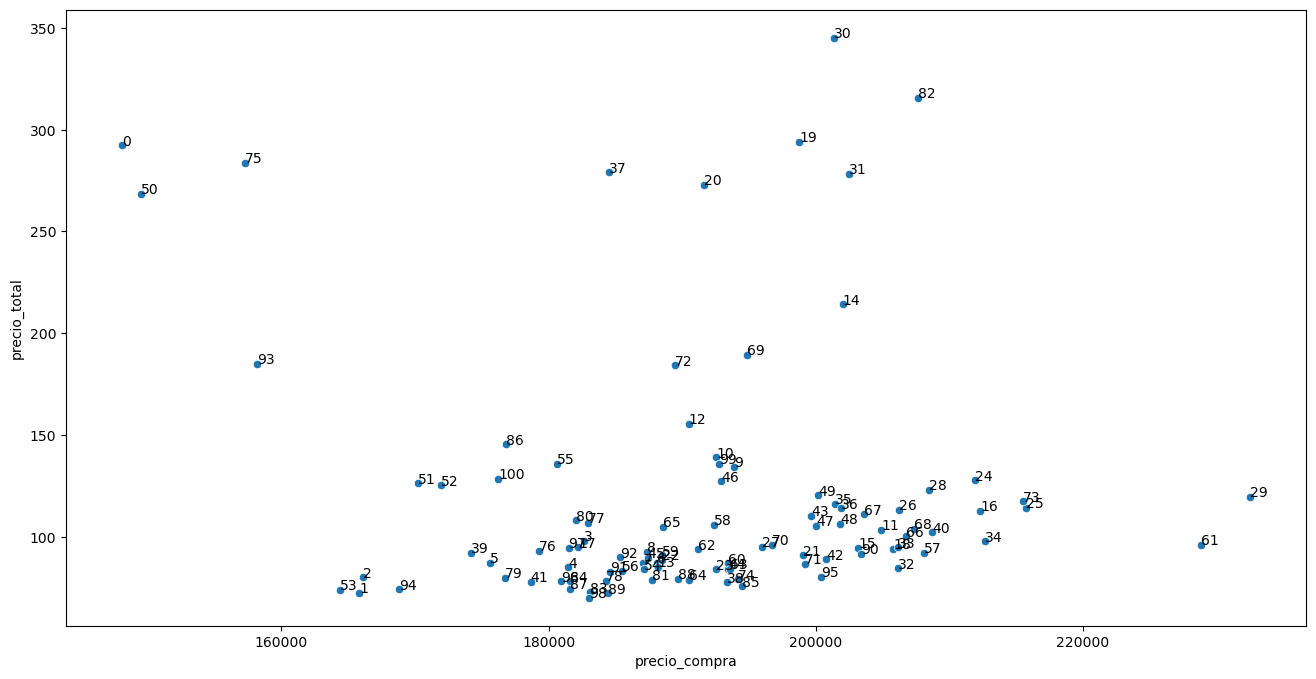

In [149]:
temp = df.groupby('ocupacion')[['precio_total', 'precio_compra']].mean()

plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total');
#Para verlo con las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

#### Analisis geográfico sobre un mapa

In [150]:
import folium

In [152]:
#Vamos a usar las coordenadas de la Puerta del Sol que ya teníamos.
folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

Vamos a analizar visualmente el insight sobre el distrito de San Blas.

In [157]:
datos = df[df.distrito == 'San Blas - Canillejas'].copy()

Para representar los marcadores de todos los pisos tenemos que crear un bucle para ir añadiéndolos al mapa.

Vamos a crear un código de colores que nos indicara visualmente el rango de precio.

Para ello vamos a crear una nueva variable discretizada y cambiaremos el marcador a un círculo de colores.

In [159]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

In [160]:
mapa = folium.Map(location=[40.4167278, -3.7033387],zoom_start=12)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa

el barrio de las Rosas, parece ser donde mas caro se alquila

**Insight 6: Existen todavía muchos puntos amarillos y naranjas, lo cual puede indicar que todavía existe potencial para explotar más el factor de los eventos deportivos**

### CONCLUSION

#### CONCLUSIONES EJECUTIVAS

* Se han localizado 10 barrios en los que centrar la búsqueda
* Se recomienda buscar inmuebles con un habitación que permitan alojar 3 huéspedes
* Se recomienda buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés
* Se recomienda evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo, especialmente en el barrio de San Blas

#### DETALLE DE LOS PRINCIPALES RESULTADOS

##### Existen 10 barrios con alto potencial de inversión

* Se han localizado 10 barrios que apriori pueden maximizar la relación coste-ingresos
* Además podemos segmentarlos por el tipo calidad del inmueble en el que nos interes invertir en 4 grandes grupos
* Estos son los 10 barrios donde comenzar a buscar oportunidades concretas:
    * Inversión baja: Simancas, Ambroz, Marroquina, San Juan Bautista
    * Inversión media: El Plantio, Valdemarín, Valdefuentes
    * Inversión media-alta: Jerónimos, Fuentela reina
    * Inversión alta: Recoletos

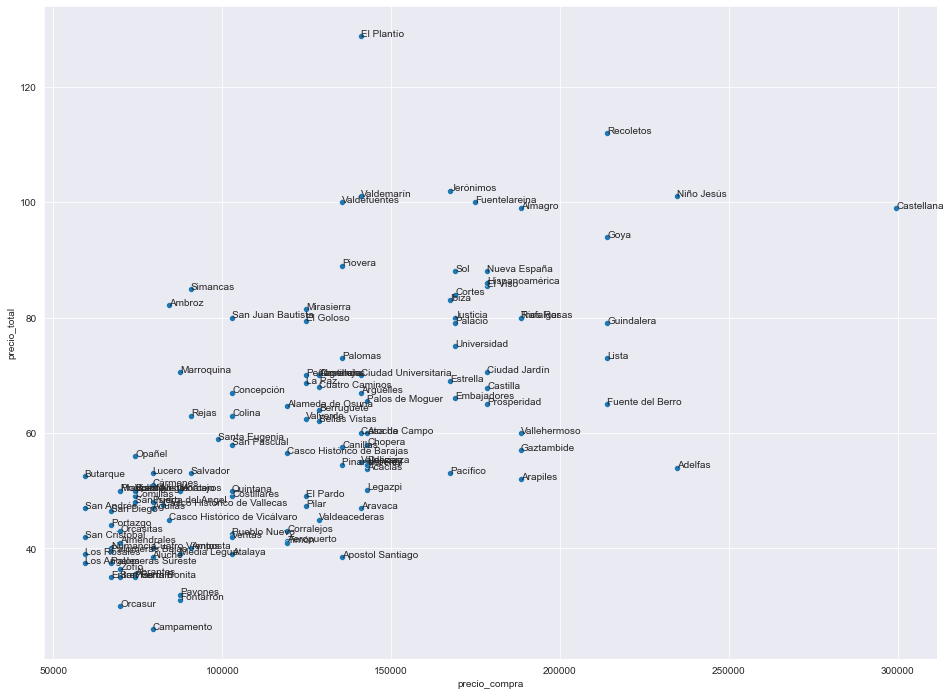

In [16]:
no_incluir = ['Rosas','Arcos','Canillejas','Hellín']

temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()

temp = temp[~temp.index.isin(no_incluir)]

plt.figure(figsize = (16,12))
sns.set_style('darkgrid')
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

##### Buscar inmuebles de una habitación que permitan 3 huéspedes

* El número de huéspedes que maximiza el precio de compra pagado es de 3

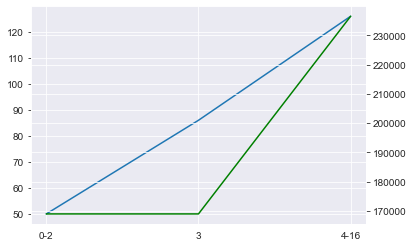

In [17]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra,color = 'green');

##### Buscar inmuebles que estando en uno de los barrios identificados no estén necesariamente cerca de puntos de interés

* Previsiblemente tendrán menor precio de compra
* Parece que la cercanía a puntos de interés no tiene un especial impacto sobre el precio del alquiler

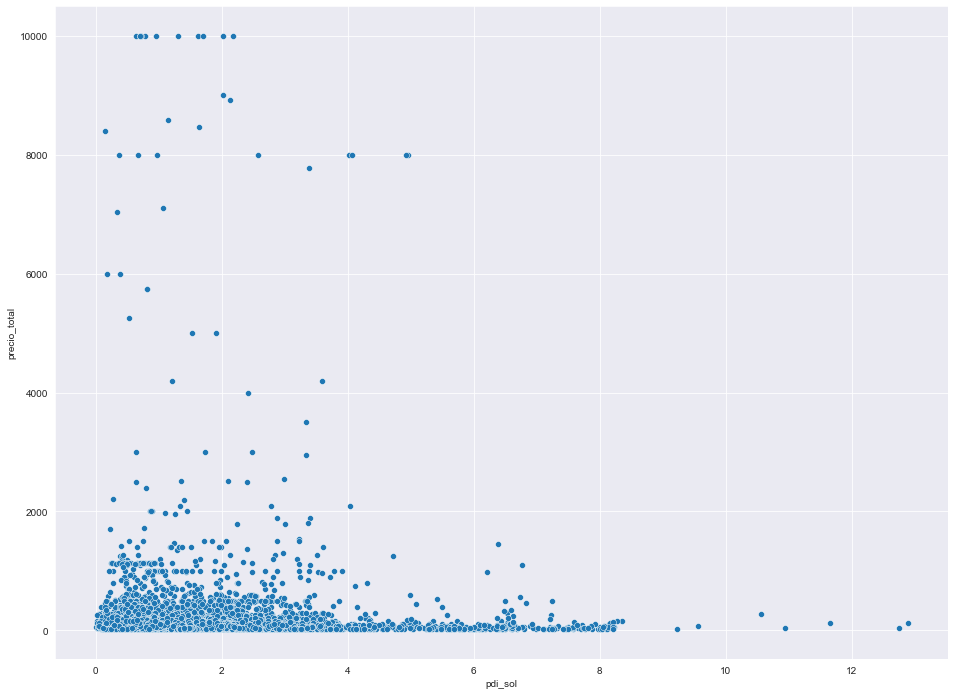

In [18]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()

plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y = 'precio_total');

##### Evaluar el desarrollo de un nuevo producto basado en el alquier para momentos concretos de alto interés deportivo

* Buscar oportunidades en el barrio de San Blas
* Todavía existen muchos alquileres que no están explotando este potencial

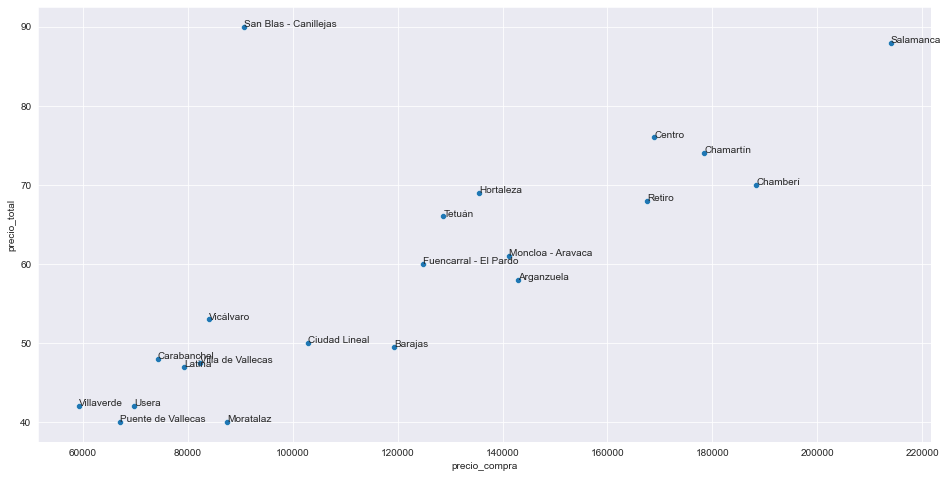

In [19]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()

plt.figure(figsize = (16,8))
sns.scatterplot(data = temp, x = 'precio_compra', y = 'precio_total')
#Ponemos las etiquetas
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra[cada], temp.precio_total[cada], temp.index[cada])

In [20]:
import folium

datos = df[df.distrito == 'San Blas - Canillejas'].copy()

datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'red'])

mapa = folium.Map(location=[datos.iloc[0,7], datos.iloc[0,8]],zoom_start=14)

for piso in range(0,len(datos)):
   folium.CircleMarker(
      location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
      popup = datos.iloc[piso]['precio_total'],
      fill=True,
      color = datos.iloc[piso]['precio_total_disc'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)

mapa